In [1]:
import pandas as pd

In [3]:
pd.read_csv('airfoil_self_noise.dat',sep = '\t')

,800,0,0.3048,71.3,0.00266337,126.201
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571
...,...,...,...,...,...,...
1497,2500,15.6,0.1016,39.6,0.052849,110.264
1498,3150,15.6,0.1016,39.6,0.052849,109.254
1499,4000,15.6,0.1016,39.6,0.052849,106.604
1500,5000,15.6,0.1016,39.6,0.052849,106.224


In [4]:
# removing column
df = pd.read_csv('airfoil_self_noise.dat',sep = '\t',header=None)

In [5]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [6]:
df.columns=["Frequency","Angle of attack","Chord length","Free stream velocity","Suction site","Pressure level"]

In [7]:
df.head()

,Frequency,Angle of attack,Chord length,Free stream velocity,Suction site,Pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [8]:
# columns from website

In [9]:
df.isnull().sum()

Frequency               0
Angle of attack         0
Chord length            0
Free stream velocity    0
Suction site            0
Pressure level          0
dtype: int64

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
## first do train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [12]:
import seaborn as sns

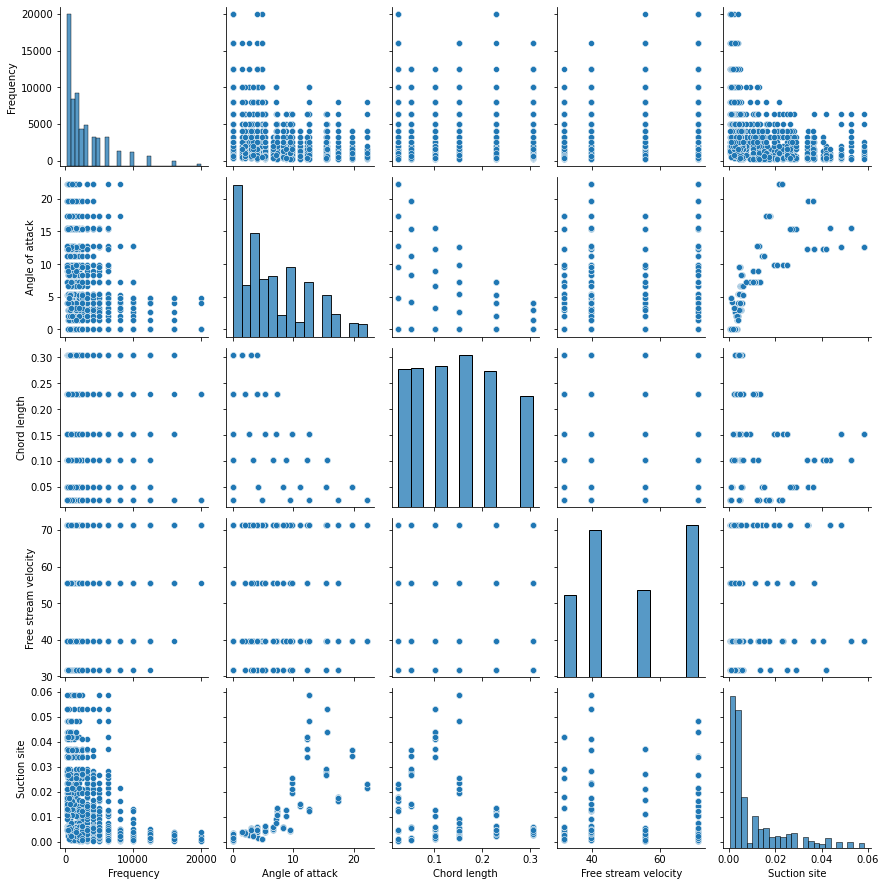

In [13]:
sns.pairplot(X_train)

In [14]:
import matplotlib.pyplot as plt
X_train.corr()

,Frequency,Angle of attack,Chord length,Free stream velocity,Suction site
Frequency,1.000000,-0.273327,-0.000324,0.125247,-0.239878
Angle of attack,-0.273327,1.000000,-0.498257,0.058603,0.762567
Chord length,-0.000324,-0.498257,1.000000,0.013061,-0.220849
Free stream velocity,0.125247,0.058603,0.013061,1.000000,-0.000519
Suction site,-0.239878,0.762567,-0.220849,-0.000519,1.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency'>

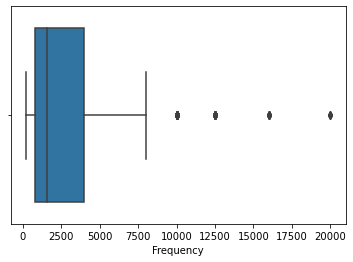

In [16]:

sns.boxplot(X_train["Frequency"])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Angle of attack'>

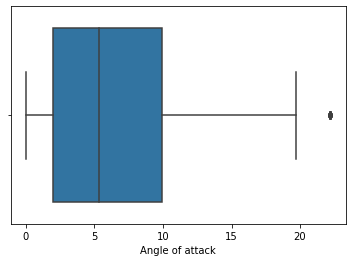

In [17]:
sns.boxplot(X_train["Angle of attack"])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


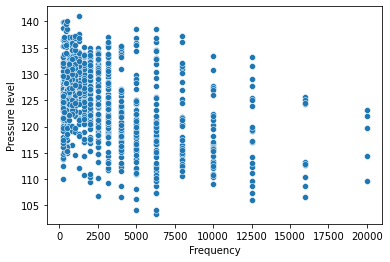

In [21]:
sns.scatterplot(X_train['Frequency'],y);

In [23]:
len(df['Pressure level'].unique())  # so this is a regression problem

1456

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pressure level'>

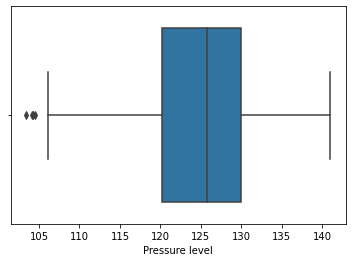

In [24]:
sns.boxplot(df["Pressure level"])

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [26]:
import pickle
pickle.dump(regressor,open('model.pkl','wb'))

In [27]:
# try to apply various algorithms and check the best accuracy

In [28]:
model = pickle.load(open("model.pkl",'rb'))

In [29]:
model.score(X_test,y_test)

0.5124474986138423

In [49]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(criterion='mse',max_depth=3)
reg.fit(df.iloc[:,:-1],df.iloc[:,-1])

DecisionTreeRegressor(max_depth=3)

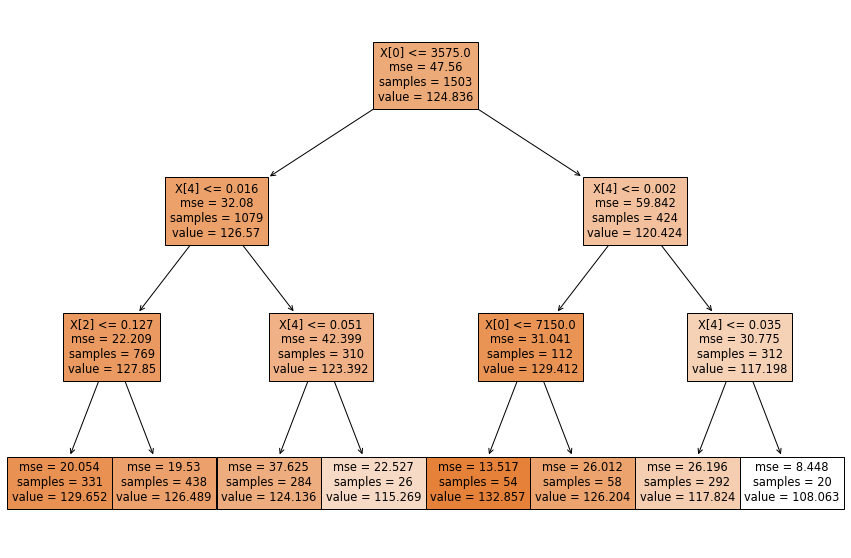

In [50]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(reg,filled=True);

In [55]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(criterion='mse',max_depth=3)
reg.fit(df.iloc[:,:-1],df.iloc[:,-1])

DecisionTreeRegressor(max_depth=3)

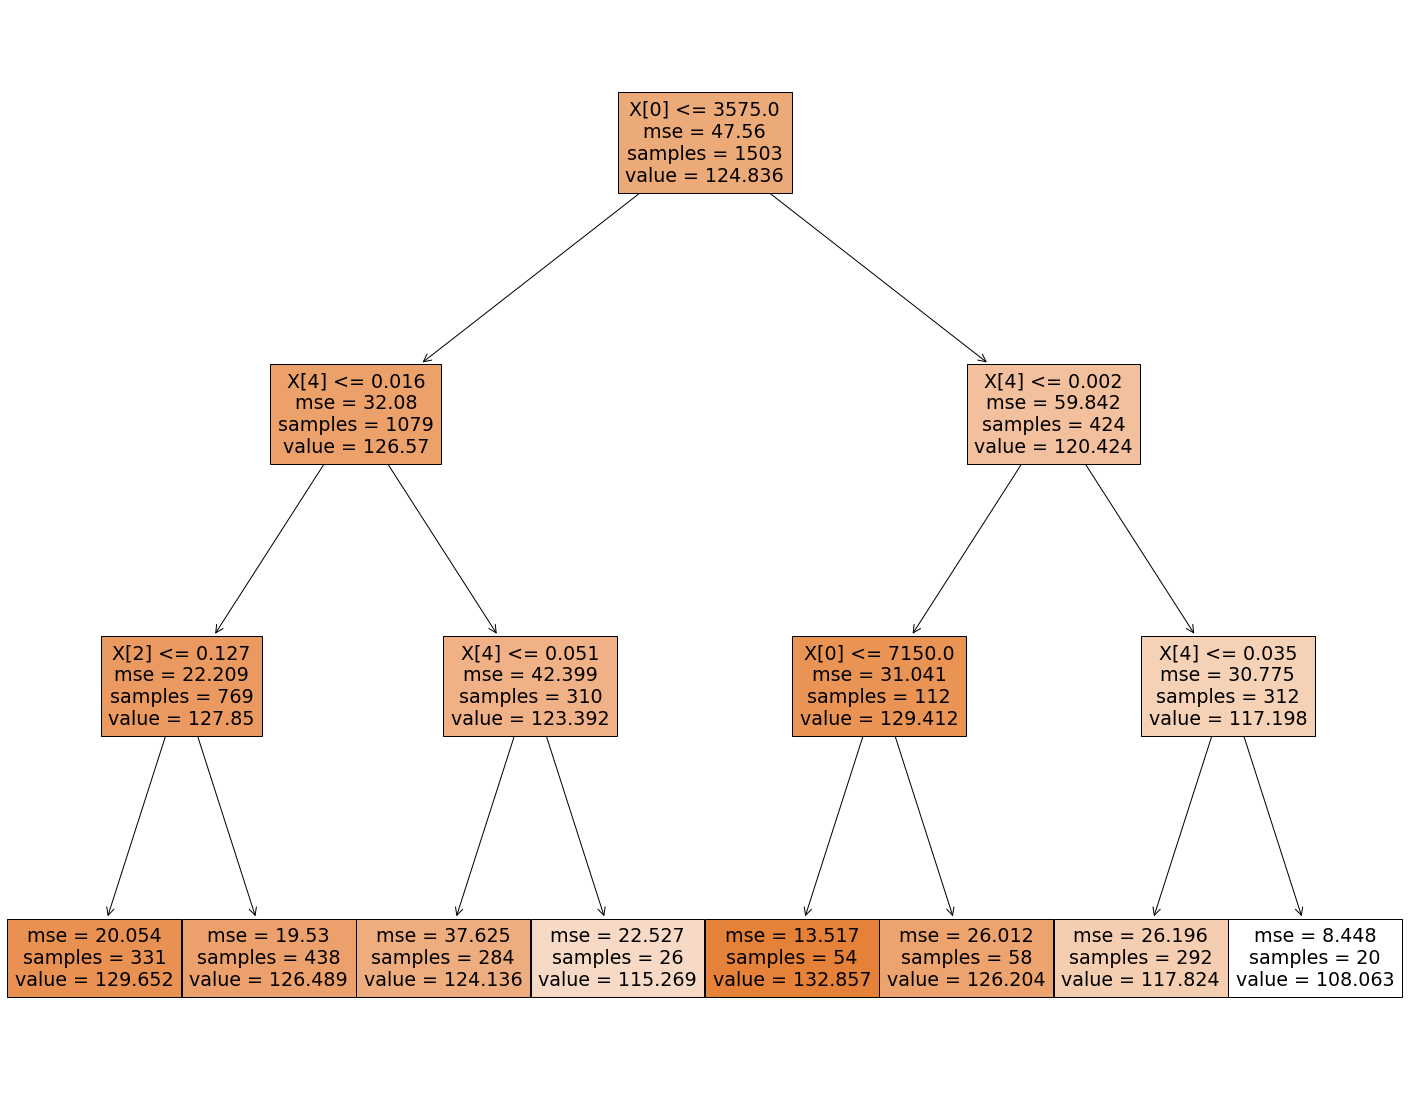

In [56]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(reg,filled=True);

In [57]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(criterion='mse')
reg.fit(df.iloc[:,:-1],df.iloc[:,-1])

DecisionTreeRegressor()

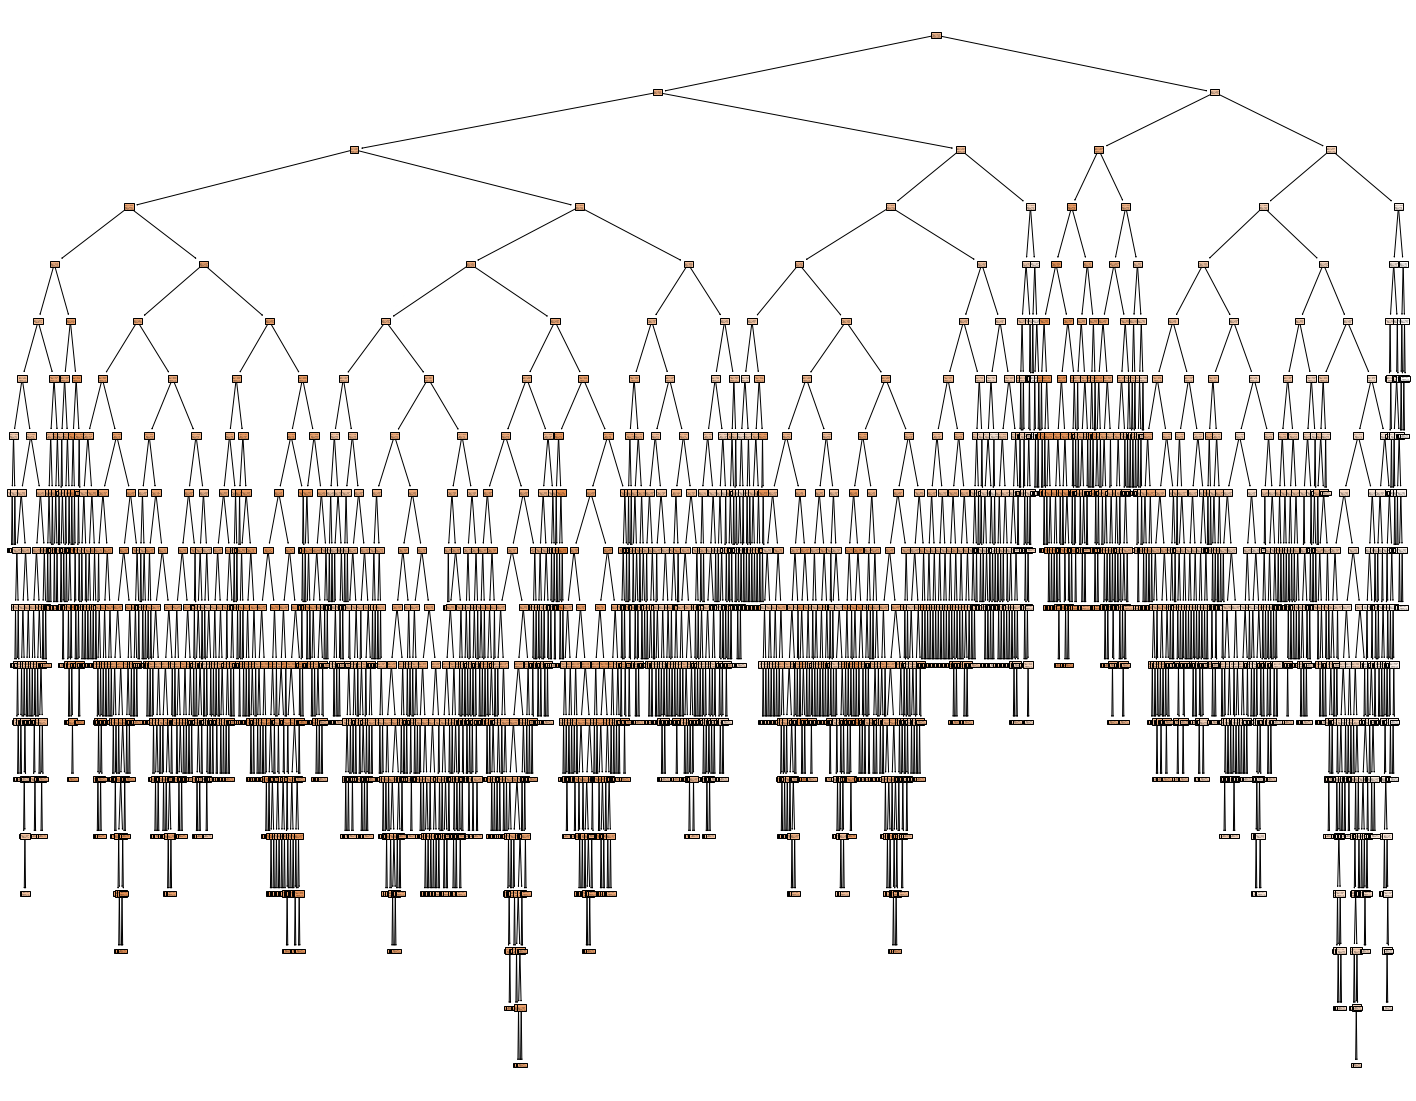

In [58]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(reg,filled=True);